<a href="https://colab.research.google.com/github/ruchits-git/Ml_algos/blob/main/ML_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naives Bayes**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/breastcancer 1.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.mean()

<ipython-input-7-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.805831e+02


In [ ]:
import seaborn as sns

<Axes: >

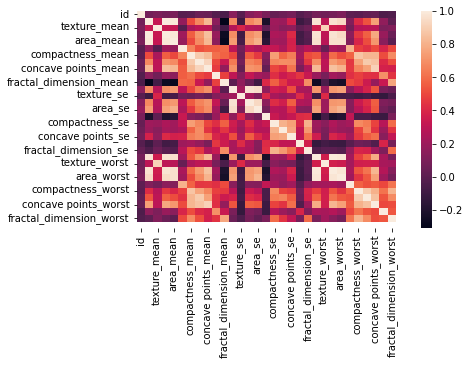

In [ ]:
sns.heatmap(df.corr())

In [ ]:
list(df)


['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [ ]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)
df.drop(['id'],axis=1,inplace=True)

In [ ]:
list(df)

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
df.shape

(569, 31)

# **Correlation Analysis**

In [ ]:
cm = df.corr()
cm

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
fts = []
for col in cm.columns:
  if all(abs(cm.loc[col,fts]<0.6)):   # 0.6 is the threshold of the dataset
    fts.append(col)
    
X = df[fts]
X

,radius_mean,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,symmetry_se
0,17.99,10.38,0.11840,0.2419,0.07871,0.9053,0.006399,0.04904,0.03003
1,20.57,17.77,0.08474,0.1812,0.05667,0.7339,0.005225,0.01308,0.01389
2,19.69,21.25,0.10960,0.2069,0.05999,0.7869,0.006150,0.04006,0.02250
3,11.42,20.38,0.14250,0.2597,0.09744,1.1560,0.009110,0.07458,0.05963
4,20.29,14.34,0.10030,0.1809,0.05883,0.7813,0.011490,0.02461,0.01756
...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.1726,0.05623,1.2560,0.010300,0.02891,0.01114
565,20.13,28.25,0.09780,0.1752,0.05533,2.4630,0.005769,0.02423,0.01898
566,16.60,28.08,0.08455,0.1590,0.05648,1.0750,0.005903,0.03731,0.01318
567,20.60,29.33,0.11780,0.2397,0.07016,1.5950,0.006522,0.06158,0.02324


In [ ]:
cols = X.columns.tolist()
cols.append('diagnosis')
cols = cols[-1:] + cols[:-1]
cols

['diagnosis',
 'radius_mean',
 'texture_mean',
 'smoothness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se']

In [ ]:
final = df[cols]
final

,diagnosis,radius_mean,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,symmetry_se
0,M,17.99,10.38,0.11840,0.2419,0.07871,0.9053,0.006399,0.04904,0.03003
1,M,20.57,17.77,0.08474,0.1812,0.05667,0.7339,0.005225,0.01308,0.01389
2,M,19.69,21.25,0.10960,0.2069,0.05999,0.7869,0.006150,0.04006,0.02250
3,M,11.42,20.38,0.14250,0.2597,0.09744,1.1560,0.009110,0.07458,0.05963
4,M,20.29,14.34,0.10030,0.1809,0.05883,0.7813,0.011490,0.02461,0.01756
...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.1726,0.05623,1.2560,0.010300,0.02891,0.01114
565,M,20.13,28.25,0.09780,0.1752,0.05533,2.4630,0.005769,0.02423,0.01898
566,M,16.60,28.08,0.08455,0.1590,0.05648,1.0750,0.005903,0.03731,0.01318
567,M,20.60,29.33,0.11780,0.2397,0.07016,1.5950,0.006522,0.06158,0.02324


In [ ]:
from scipy.stats import lognorm

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'texture_se'}>],
       [<Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'symmetry_se'}>]], dtype=object)

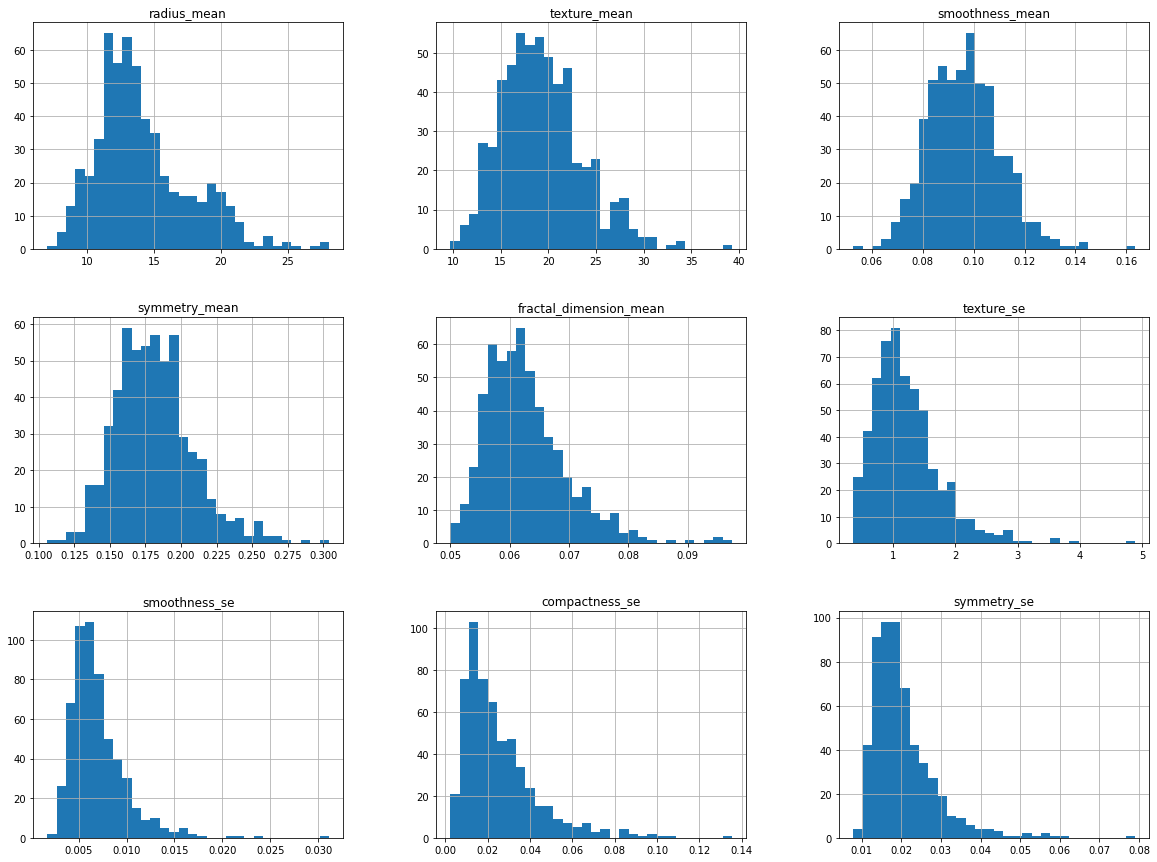

In [ ]:
X.hist(bins=30,figsize=(20,15))

# **Distribution Analysis**

0.9423795716730992
0.6504495420828159
0.45632376481955844
0.7256089733641999
1.3044888125755076
1.646443808753053
2.314450056636759
1.9022207096378565
2.1951328995478216


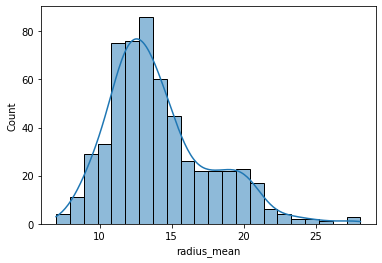

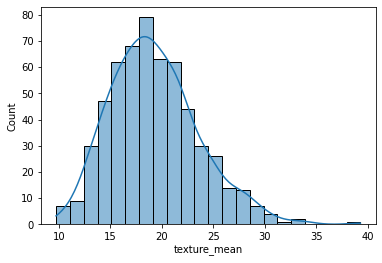

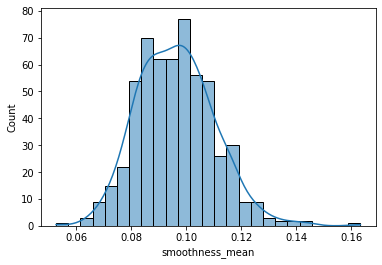

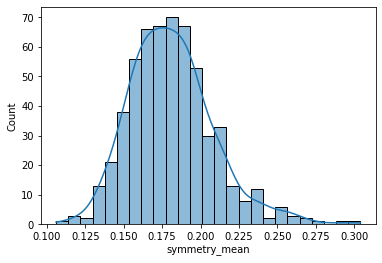

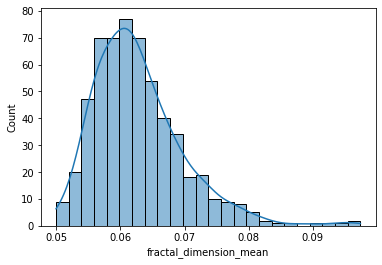

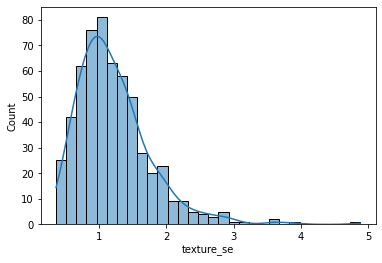

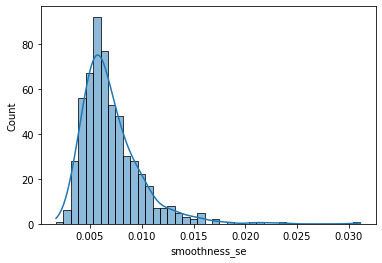

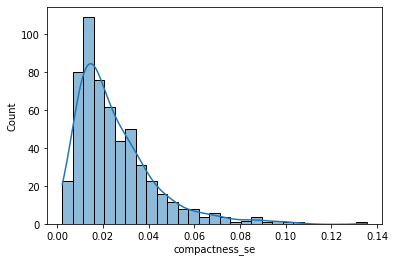

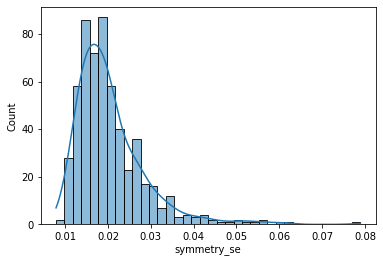

In [ ]:
ffts = []
for i,col in enumerate(X.describe().columns):
  plt.figure(i)
  print(X[col].skew())
  if X[col].skew()>=1.75:
    ffts.append(col)

  sns.histplot(df[col],kde=True)

In [ ]:
print(ffts)

['smoothness_se', 'compactness_se', 'symmetry_se']


In [ ]:
X.drop(ffts,axis=1,inplace=True)
X

<ipython-input-22-6f664e7a9194>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(ffts,axis=1,inplace=True)


,radius_mean,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se
0,17.99,10.38,0.11840,0.2419,0.07871,0.9053
1,20.57,17.77,0.08474,0.1812,0.05667,0.7339
2,19.69,21.25,0.10960,0.2069,0.05999,0.7869
3,11.42,20.38,0.14250,0.2597,0.09744,1.1560
4,20.29,14.34,0.10030,0.1809,0.05883,0.7813
...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.1726,0.05623,1.2560
565,20.13,28.25,0.09780,0.1752,0.05533,2.4630
566,16.60,28.08,0.08455,0.1590,0.05648,1.0750
567,20.60,29.33,0.11780,0.2397,0.07016,1.5950


In [ ]:
X

,radius_mean,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se
0,17.99,10.38,0.11840,0.2419,0.07871,0.9053
1,20.57,17.77,0.08474,0.1812,0.05667,0.7339
2,19.69,21.25,0.10960,0.2069,0.05999,0.7869
3,11.42,20.38,0.14250,0.2597,0.09744,1.1560
4,20.29,14.34,0.10030,0.1809,0.05883,0.7813
...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.1726,0.05623,1.2560
565,20.13,28.25,0.09780,0.1752,0.05533,2.4630
566,16.60,28.08,0.08455,0.1590,0.05648,1.0750
567,20.60,29.33,0.11780,0.2397,0.07016,1.5950


# **Calculate Values**

In [ ]:
# Calculate P(Y=y) for all values of y

def cal_prior(final,Y):
  classes = sorted(list(final[Y].unique()))
  prior = []
  for i in classes:
    prior.append((len(final[final[Y]==i]))/len(final))

  print(prior)

cal_prior(final,'diagnosis')

[0.6274165202108963, 0.37258347978910367]


In [ ]:
# Calculate P(X=x/Y=y) using Gaussian

def cal_likelihood_gaussian(final,feat_name,feat_value,Y,label):
  feat = list(final.columns)
  final = final[final[Y] == label]
  mean,std = final[feat_name].mean(), final[feat_name].std()
  P_x_given_y = (1/np.sqrt(2*np.pi)*std)*np.exp(-((feat_value.mean())**2/2*std))
  return P_x_given_y

cal_likelihood_gaussian(final,'smoothness_mean',final.at[1,'smoothness_mean'],'diagnosis','M')

0.00502973052643001

In [ ]:
# Calculate P(X=X1|Y=y) P(X=X2|Y=y)......fir all Y and find max
def naives_bayes_gaussian(final,X,Y):
  feature = list(final.columns)[1:]
  prior = cal_prior(final,Y)
  y_pred = []
  for x in X:
    labels = sorted(list(final[Y].unique()))
    likelihood = [1]*len(labels)
    for j in range(len(labels)):
      likelihood[j] *= cal_likelihood_gaussian(final[i],final.at[i,x],Y,labels[j])
      post_prob = [1] * len(labels)
      for j in range(len(labels)):
        post_prob[j] = likelihood[j] * prior[j]
  y_pred.append(np.argmax(post_prob)) 
  return np.array(y_pred)   

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(final, test_size=0.2, random_state=41)

x_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
y_pred = naives_bayes_gaussian(train, X = x_test, Y = "diagnosis")

[0.621978021978022, 0.378021978021978]


KeyError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## **Using Sklearn**

In [ ]:
%matplotlib inline

In [ ]:
df1 = pd.read_csv('/content/Social_Network_Ads 1.csv')
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df1.shape

(400, 5)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df1.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

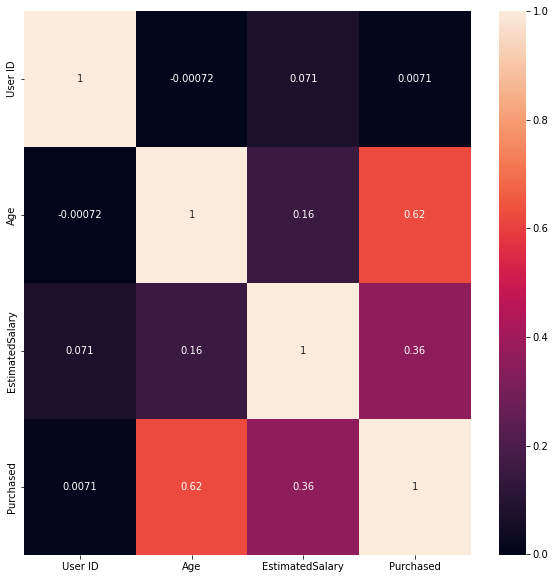

In [ ]:
fig1 = plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)

In [ ]:
data1 = pd.DataFrame(df1)
data1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data1['Gender']= label_encoder.fit_transform(data1['Gender'])

In [ ]:
data1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
X=data1.drop(['User ID','Purchased'],axis =1)
Y=data1['Purchased']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
GauNB = GaussianNB()

GauNB.fit(X_train,Y_train)

GaussianNB()

In [ ]:
Y_pred = GauNB.predict(X_test)

In [ ]:
print("testing accuracy = {accuracy_score(Y_test,Y_pred)}")

testing accuracy = {accuracy_score(Y_test,Y_pred)}


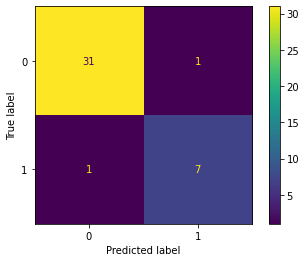

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.88      0.88      0.88         8

    accuracy                           0.95        40
   macro avg       0.92      0.92      0.92        40
weighted avg       0.95      0.95      0.95        40

